In [1]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib
import matplotlib.pyplot as plt
plt.ion()
%matplotlib inline
from cavsim2d.cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [2]:
# load shape space
with open(r'D:/Dropbox/CavityDesignHub/MuCol_Study/Cavities/cavity_data_mid_end_cells.json') as f:
    shape_space = json.load(f)
# pp.pprint(shape_space)

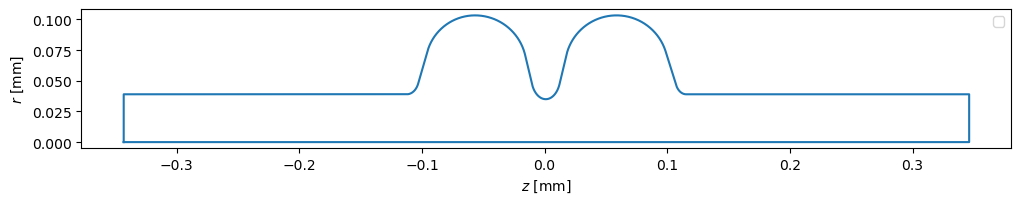

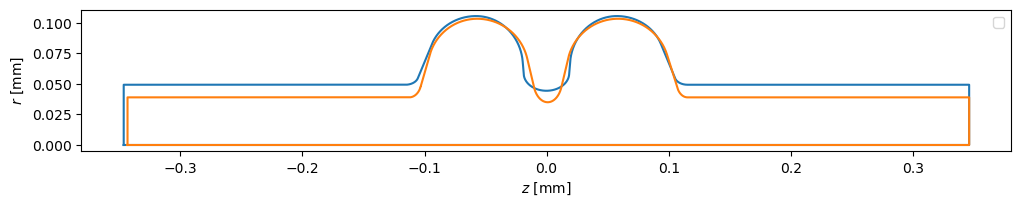

In [6]:
# define geometry parameters
midcell = np.array([42, 42, 12, 19, 35, 57.7, 100])
endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# create cavity
cav0 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
ax = cav0.plot('geometry')

C3795_1300MHz = shape_space['C3795_1300MHz']
TESLA = shape_space['TESLA']

# create cavity
cav = Cavity(2, np.array(C3795_1300MHz['IC']), np.array(C3795_1300MHz['OC']), np.array(C3795_1300MHz['OC_R']), beampipe='both')
ax = cav.plot('geometry')

# create cavity
cav1 = Cavity(2, TESLA['IC'], TESLA['OC'], TESLA['OC_R'], beampipe='both')
# show cavity
cav1.plot('geometry', ax)
plt.show()

In [5]:
cav1.inspect(variation=0.5)

Output()

# Run eigenmode analysis

In [10]:
from cavsim2d.cavity import *
# create cavities
cavs = Cavities()
# must first save cavities
cavs.save('D:\Dropbox\CavityDesignHub\MuCol_Study\SimulationData\ConsoleTest')

# # define geometry parameters
# midcell = np.array([42, 42, 12, 19, 35, 57.7, 103.353])
# endcell_l = np.array([40.34, 40.34, 10, 13.5, 39, 55.716, 103.353])
# endcell_r = np.array([42, 42, 9, 12.8, 39, 56.815, 103.353])
# # create cavity
# cav1 = Cavity(2, midcell, endcell_l, endcell_r, beampipe='both')
# cavs.add_cavity([cav1], ['TESLA'])

# add cavities
# cavs.add_cavity([cav0, cav, cav1], names=['cav0', 'C3795_1300MHz', 'TESLA'], plot_labels=['cav0', 'C3795$_{1300MHz}$', 'TESLA'])
cavs.add_cavity([cav0, cav1], names=['cav0', 'TESLA'], plot_labels=['cav0', 'TESLA'])

uq_config = {
    'option': True,
    'variables': ['A', 'B'],
    # 'objectives': ["freq [MHz]", "R/Q [Ohm]", "Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "G [Ohm]", "kcc [%]", "ff [%]"],
    'objectives': ["Epk/Eacc []", "Bpk/Eacc [mT/MV/m]", "R/Q [Ohm]", "G [Ohm]"],
    # 'objectives': ["ZL"],
    'delta': [0.03, 0.03],
    'processes': 3,
    'distribution': 'gaussian',
    # 'method': ['QMC', 'LHS', 1000],
    # 'method': ['QMC', 'Sobol', 1000],
    # 'method': ['Qudrature', 'Gaussian', 1000],
    'method': ['Quadrature', 'Stroud3'],
    # 'method': ['Quadrature', 'Stroud5'],
    # 'gaussian': ['Quadrature', 'Gaussian'],
    # 'from file': ['<file path>', columns],
    'cell type': 'mid-cell',
    'cell complexity': 'multicell'
}

# run eigenmode analysis
# cavs.run_eigenmode('ngsolve', rerun=True, procs=3, uq_config=uq_config)  #modify to delete UQ results if rerun=True is selected

Exception occurred: 


In [6]:
pp.pprint(cavs.eigenmode_qois)
pp.pprint(cavs.uq_fm_results)

{   'TESLA': {   'Bpk [mT]': 0.0001301560269215086,
                 'Bpk/Eacc [mT/MV/m]': 4.252639317164162,
                 'Eacc [MV/m]': 3.060594073806901e-05,
                 'Epk [MV/m]': 6.20323807714188e-05,
                 'Epk/Eacc []': 2.0268084978110217,
                 'G [Ohm]': 269.979664156101,
                 'GR/Q [Ohm^2]': 59192.05143969757,
                 'Hpk [A/m]': 0.1035748752887995,
                 'N Cells': 2,
                 'Normalization Length [mm]': 115.3048,
                 'Q []': 29093.542469011165,
                 'R/Q [Ohm]': 219.24633332928732,
                 'Req [mm]': 103.353,
                 'Rsh [MOhm]': 6.378652509890599,
                 'Vacc [MV]': 7.058023751229799e-06,
                 'ff [%]': -100.18177041091417,
                 'freq [MHz]': 1300.036120609789,
                 'kcc [%]': 0.9508546083774413},
    'cav0': {   'Bpk [mT]': 0.0001301621029283226,
                'Bpk/Eacc [mT/MV/m]': 4.25732972414274,
     

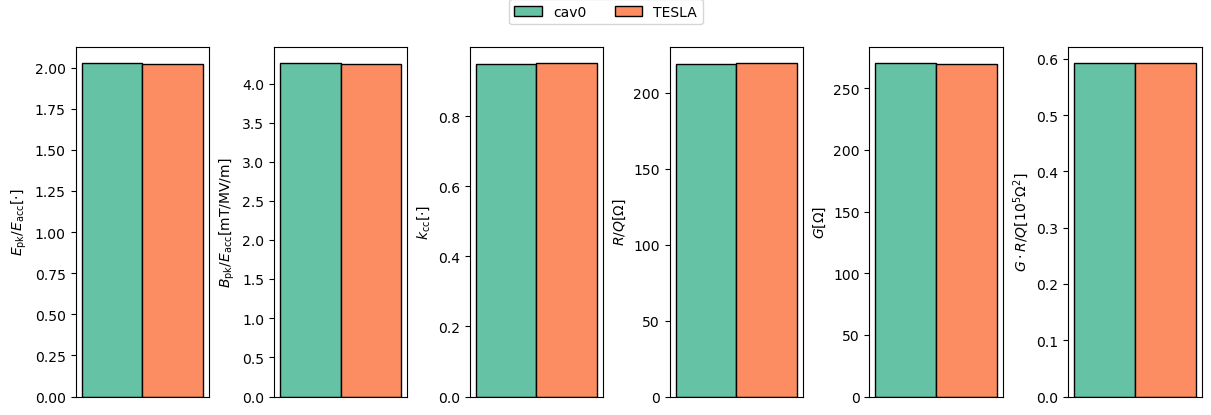

In [7]:
cavs.plot_compare_fm_bar()
plt.show()

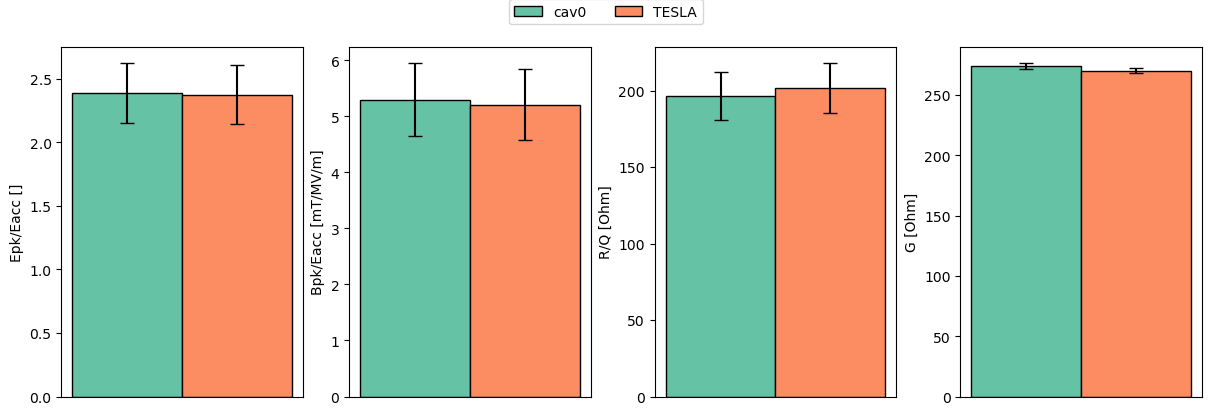

In [8]:
cavs.plot_compare_fm_bar(uq=True)
plt.show()

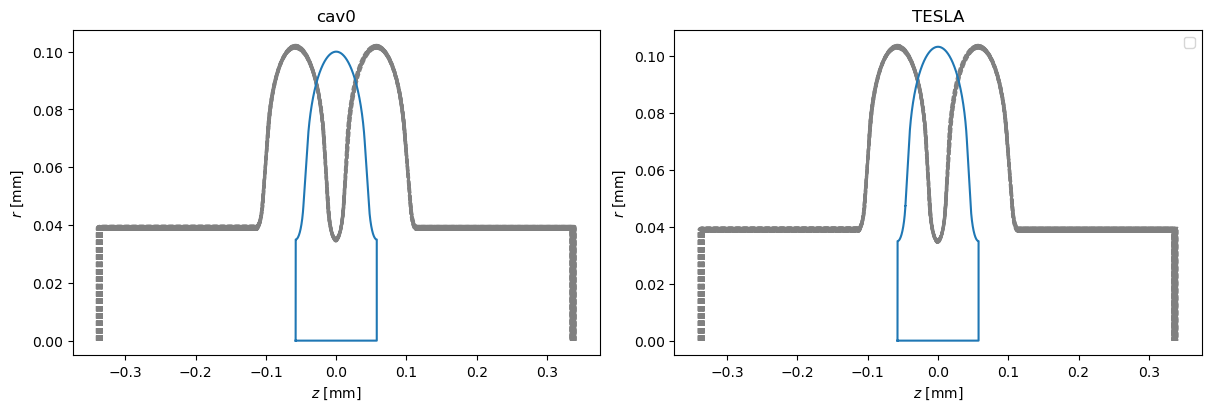

In [9]:
cavs.plot_uq_geometries()

# Run wakefield analysis

In [ ]:
cavs.run_wakefield(bunch_length=25, rerun=False)

# Run wakefield for operating points

In [ ]:
op_points = OperationPoints()
op_points.get_default_operating_points()
pp.pprint(op_points.op_points['W_2023'])
cavs.run_wakefield(operating_points={'Z_2023': op_points.op_points['Z_2023'], 'W_2023': op_points.op_points['W_2023']}, rerun=False)

In [ ]:
pp.pprint(cavs.abci_qois)

In [ ]:
cavs.cavities_list[0].abci_data['Long'].data_dict.keys()

In [ ]:
plt.close()
fig, ax = plt.subplots(figsize=(12, 4))
ax = cavs.plot('ZL', ax)

cavs.plot('ZT', ax)
ax.set_yscale('log')

cavs.define_operating_points(op_points.op_points)
cavs.plot_thresholds(which='tr', selection=['Z_2023', 'W_2023', 'H_2023', 'ttbar_2023'], ax=ax)

cavs._adjust_texts(cavs.threshold_texts_objects, ax)
cavs.plot_cutoff(Ri_list=[39], which=['te11', 'tm01'], ax=ax)

plt.show()

In [ ]:
cavs.plot_compare_hom_bar('Z_2023_SR_4.32mm')
plt.show()
cavs.plot_compare_all_bar('Z_2023_SR_4.32mm')
plt.show()

In [ ]:
cavs.plot('geometry')
plt.show()

# 2 cell cavity geometry thesis

In [ ]:
import sys
sys.path.append("..")
import numpy as np
import json
import matplotlib.pyplot as plt

import mpld3
plt.ion()
from cavity import Cavity, Cavities, OperationPoints
import pprint
pp = pprint.PrettyPrinter(indent=4)

In [ ]:
# load shape space
with open(r'D:\Dropbox\CavityDesignHub\PhD_Thesis\Cavities\cavities.json') as f:
    shape_space = json.load(f)


In [ ]:
# create cavity
c3794_geom = shape_space['C3794']
c3794 = Cavity(2, np.array(c3794_geom['IC']), np.array(c3794_geom['OC']), np.array(c3794_geom['OC_R']), beampipe='both')
# show cavity
c3794.plot('geometry')

# Optimisation

# Pillbox